In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn

In [353]:
df = "https://raw.githubusercontent.com/Roberto-M-M/carne/main/meat-consumption-vs-gdp-per-capita.csv"
df = pd.read_csv(df, encoding='utf-8-sig')
df.head(2450) #Revisamos los datos de Chile

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1961,14.719367,NaN,NaN
2,Afghanistan,AFG,1962,14.738824,NaN,NaN
3,Afghanistan,AFG,1963,15.176605,NaN,NaN
4,Afghanistan,AFG,1964,15.378455,NaN,NaN
...,...,...,...,...,...,...
2445,Chile,CHL,2007,78.597885,20140.530,NaN
2446,Chile,CHL,2008,78.389610,20695.562,NaN
2447,Chile,CHL,2009,74.646515,20255.100,NaN
2448,Chile,CHL,2010,79.159970,21225.104,NaN


In [354]:
df.tail(10) #vemos los datos finales

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)",Continent
13650,Zimbabwe,ZWE,2012,65.899994,2310.8071,NaN
13651,Zimbabwe,ZWE,2013,63.040000,2333.6445,NaN
13652,Zimbabwe,ZWE,2014,51.259968,2316.9546,NaN
13653,Zimbabwe,ZWE,2015,55.050010,2313.8787,Africa
13654,Zimbabwe,ZWE,2016,54.479980,2286.6235,NaN
13655,Zimbabwe,ZWE,2017,51.559998,2331.7808,NaN
13656,Zimbabwe,ZWE,2018,50.109962,2399.6216,NaN
13657,Zimbabwe,ZWE,2019,50.280014,2203.3967,NaN
13658,Zimbabwe,ZWE,2020,52.010020,1990.3195,NaN
13659,Zimbabwe,ZWE,2021,55.969982,2115.1445,NaN


In [355]:
# 1. Datos faltantes
print(df.isnull().sum())
# You might want to handle missing values depending on their volume and␣importance
print(df.isna().sum())
# 2. Estadisticas descriptivas
print(df.describe())

Entity                                                                                                    0
Code                                                                                                   2875
Year                                                                                                      0
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita     1068
GDP per capita, PPP (constant 2017 international $)                                                    7314
Continent                                                                                             13375
dtype: int64
Entity                                                                                                    0
Code                                                                                                   2875
Year                                                                                                      0
Meat, total | 0

In [356]:
df.isnull().sum().sum() #calculamos la cantidad total de datos faltantes
df.isna().sum().sum()

24632

In [357]:
# Países únicos
unique_countries = df['Entity'].unique()
print(unique_countries)

['Abkhazia' 'Afghanistan' 'Africa' 'Africa (FAO)' 'Akrotiri and Dhekelia'
 'Aland Islands' 'Albania' 'Algeria' 'American Samoa' 'Americas (FAO)'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Asia (FAO)' 'Australia' 'Austria'
 'Austria-Hungary' 'Azerbaijan' 'Baden' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Belgium-Luxembourg (FAO)'
 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Caribbean (FAO)'
 'Cayman Islands' 'Central African Republic' 'Central America (FAO)'
 'Central Asia (FAO)' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China (FAO)' 'Christmas Island' 'Cocos Islands' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croati

In [358]:
#Tipo de datos
df.dtypes


Entity                                                                                                 object
Code                                                                                                   object
Year                                                                                                    int64
Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita    float64
GDP per capita, PPP (constant 2017 international $)                                                   float64
Continent                                                                                              object
dtype: object

In [359]:
# Borramos columna de Continent
df = df.drop('Continent', axis=1)
df.to_csv("https://raw.githubusercontent.com/Roberto-M-M/carne/main/meat-consumption-vs-gdp-per-capita.csv",index=False)

In [360]:
# Botamos todos los datos NaN y Null
df = df.dropna()
# Save the modified DataFrame back to a new CSV file
df.to_csv("https://raw.githubusercontent.com/Roberto-M-M/carne/main/meat-consumption-vs-gdp-per-capita.csv",index=False)

In [361]:
df.head(945)

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita","GDP per capita, PPP (constant 2017 international $)"
42,Afghanistan,AFG,2002,14.495209,1280.4631
43,Afghanistan,AFG,2003,13.168231,1292.3335
44,Afghanistan,AFG,2004,13.960530,1260.0605
45,Afghanistan,AFG,2005,14.268150,1352.3207
46,Afghanistan,AFG,2006,11.292855,1366.9932
...,...,...,...,...,...
2394,Chad,TCD,2018,44.979992,1563.5440
2395,Chad,TCD,2019,45.470010,1561.9967
2396,Chad,TCD,2020,46.519978,1489.1868
2397,Chad,TCD,2021,47.129990,1425.4945


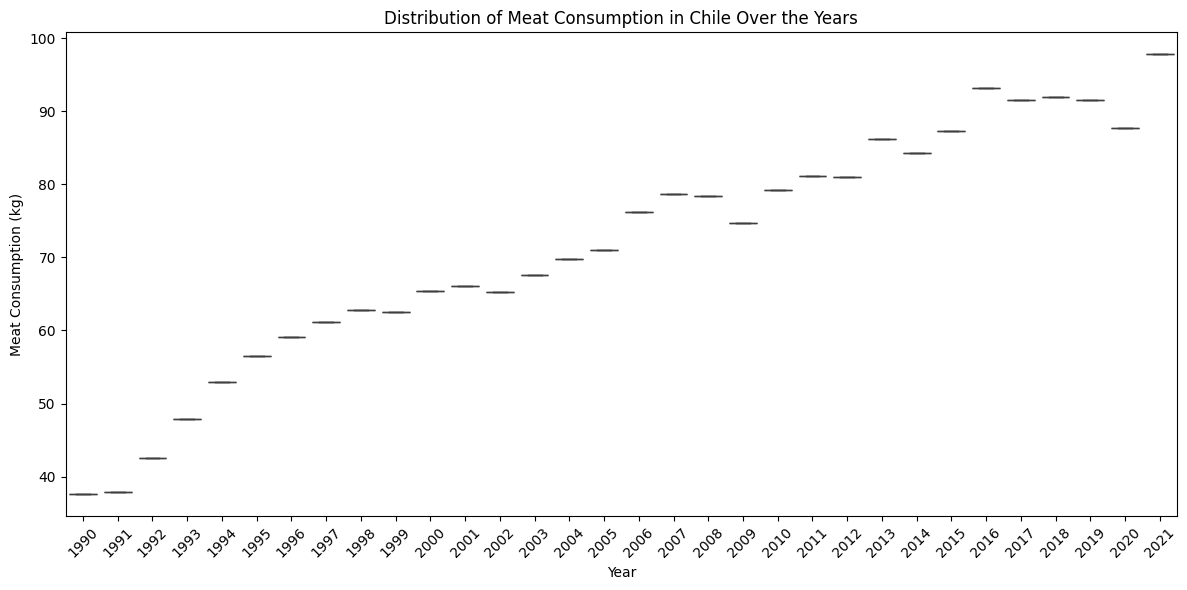

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para Chile
df_chile = df[df['Entity'] == 'Chile']

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar el boxplot
sns.boxplot(
    x='Year', 
    y='Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita', 
    data=df_chile, 
    width=0.8
)

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Meat Consumption (kg)')
plt.title('Distribution of Meat Consumption in Chile Over the Years')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar parámetros del subplot para dar suficiente espacio a las etiquetas del eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()


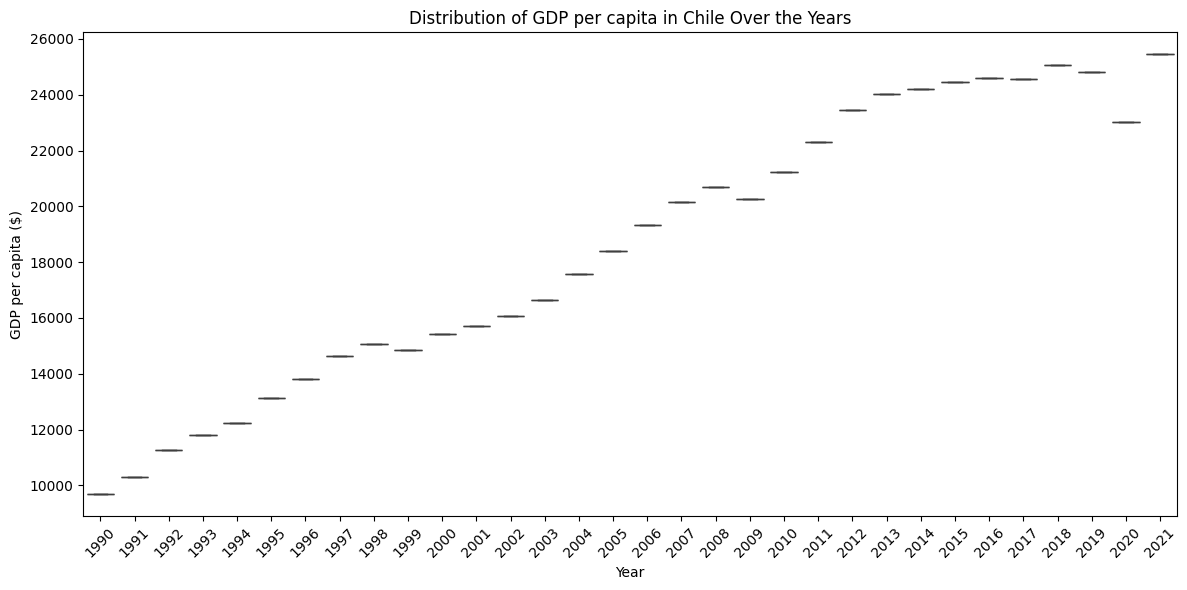

In [363]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GDP per capita, PPP (constant 2017 international $)', data=df_chile, width=0.8)
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.title('Distribution of GDP per capita in Chile Over the Years')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust subplot parameters to give enough space for x-axislabels
plt.show()

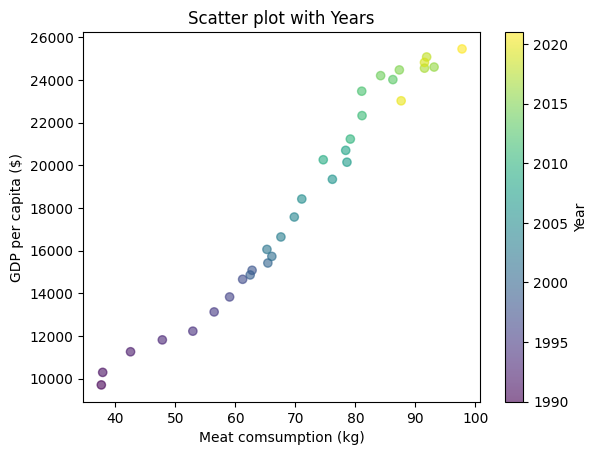

In [364]:
#identificamos los datos pertenecientes a Chile y graficamos la gráfica la relación entre consumo de carne y PIB per capita
inicio = 945
fin = 976
df_chile = df.iloc[inicio-1:fin]
years = df_chile['Year']
columna_a = df_chile['Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita']
columna_b = df_chile['GDP per capita, PPP (constant 2017 international $)']
plt.scatter(columna_a, columna_b, c=years, cmap='viridis', alpha=0.6)
plt.colorbar(label='Year')
plt.xlabel('Meat comsumption (kg)')
plt.ylabel('GDP per capita ($)')
plt.title('Scatter plot with Years')
plt.show()


In [365]:
V1=columna_a
V1=np.reshape(V1,(len(V1),1))
V2=columna_b
V2=np.reshape(V2,(len(V2),1))
V1.shape,V2.shape

((32, 1), (32, 1))

In [366]:
#Separo los datos de "train" en entrenamiento y prueba para probar los␣algoritmos
X_train, X_test, y_train, y_test = train_test_split(V1, V2, test_size=0.8)
#si queremos podemos ver el tamaño de los datos
len(X_train), len(X_test), len(y_train), len(y_test)
#X_test.shape #como los datos que recibimos no son tipo vector o arreglo, en el␣modelo debemos agregar corchetes adicionales

(6, 26, 6, 26)

In [367]:
#podemos ver la forma o tipo de datos obtenidos
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)
#como se puede ver, el resultado de la división son vectores de 1 dimensión, y esto será un problema para la función
#de entrenamiento ya que ella necesita vectores fila o vectores columna. Por␣tanto, necesitamos hacer la transformación

(6, 1)
(26, 1)
(6, 1)
(26, 1)


(None, None, None, None)

In [368]:
X_train.shape#, X_train.shape, y_train.shape, y_test.shape
#ojo ejecutar solo una vez, ya que cada vez que se ejecuta, le agrega una nueva␣dimensión

(6, 1)

In [369]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)


(6, 1)
(26, 1)
(6, 1)
(26, 1)


(None, None, None, None)

In [370]:
modelo = linear_model.LinearRegression()
modelo

LinearRegression()

In [371]:
#Entreno el modelo: cuidado, sklearn solicita los datos en dos dimensiones,␣tipo vector, no hay problema, le enviamos
#los datos en 2D o tipo vector convertidos con la función np.newaxis, y listo.
modelo.fit(X_train, y_train)
#El método fit es el que se encarga de de ajustar los parámetros de la␣regresión usando el método de los mínimos cuadrados
#que es la suma de los cuadrados de la diferencia de los datos reales con los␣datos estimados

LinearRegression()

In [372]:
#Realizo una predicción con el modelo previamente entrenado y utilizando el␣comando predict
y_pred = modelo.predict(X_test) #recordemos enviarle los datos en 2D
y_pred[0:5]
#y_pred.shape

array([[21974.9560669 ],
       [12232.51225752],
       [15235.3337814 ],
       [10813.95651653],
       [22890.59914115]])

Text(0, 0.5, 'GDP')

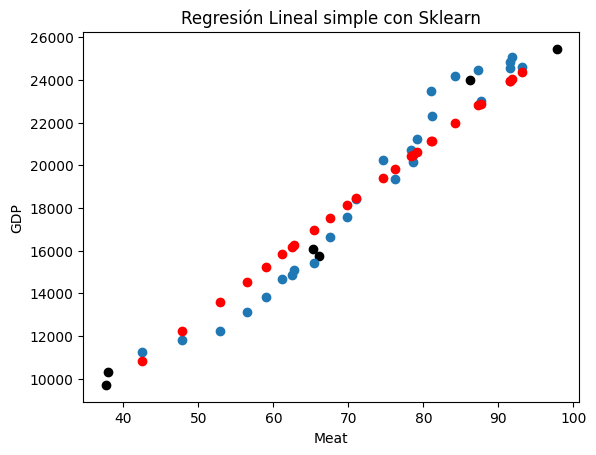

In [373]:
#graficamos los resultados
plt.scatter(X_train, y_train, color='black')
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='red')
#plt.plot(X_test, y_pred, color='red')
plt.title('Regresión Lineal simple con Sklearn')
plt.xlabel('Meat')
plt.ylabel('GDP')

In [374]:
print('DATOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente del modelo o coeficiente b1 = {}'.format(modelo.coef_))
print('Valor de la intersección o coeficiente b0 = {}'.format(modelo.intercept_))
print()
print('La ecuación del modelo lineal es:')
print('y_pred = {} + {}x'.format(modelo.intercept_, modelo.coef_))

DATOS DEL MODELO DE REGRESIÓN LINEAL SIMPLE

Valor de la pendiente del modelo o coeficiente b1 = [[267.73502446]]
Valor de la intersección o coeficiente b0 = [-571.01302027]

La ecuación del modelo lineal es:
y_pred = [-571.01302027] + [[267.73502446]]x


In [375]:
print('Precisión del modelo:') #para evaluar el modelo, sólo usamos los datos
R2 = modelo.score(X_train, y_train)
print('R2 = {}'.format(R2))


Precisión del modelo:
R2 = 0.9753091437357975


In [376]:
#para obtener este error o la formula lo podemos importar desde sklearn
from sklearn.metrics import mean_squared_error
#calculamos el mse:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE = {}'.format(mse))

MSE = 1247020.4749205115


In [377]:
rmse = np.sqrt(mse)
print('RMSE = {}'.format(rmse))

RMSE = 1116.7007096444918
